<a href="https://colab.research.google.com/github/MrVersatile007/Kaggle-Titanic/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [531]:
#Let's get our hands dirty
#TITANIC UISNG LOGISTIC ML

START WITH COLLECTING DATA

In [532]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [533]:
titanic_data = pd.read_csv("train[1].csv")

In [534]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [535]:
titanic_data.size

10692

COLLECTION IS COMPLETED

ANALYSING DATA 

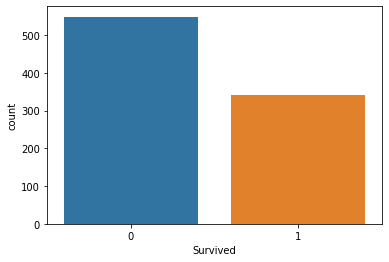

In [536]:
# our target variable is to check survival
sns.countplot(x="Survived", data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


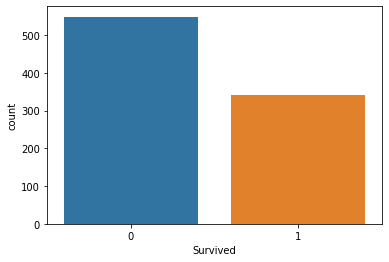

In [537]:
#another way
sns.countplot(titanic_data["Survived"])

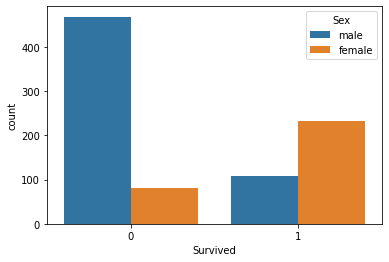

In [538]:
#2nd attribute is sex
sns.countplot(x="Survived", hue= "Sex", data = titanic_data)
#looks like men had a bad time

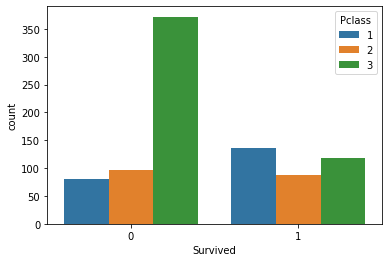

In [539]:
#3rd attribute is Pclass
sns.countplot(x="Survived", hue= "Pclass", data= titanic_data) 

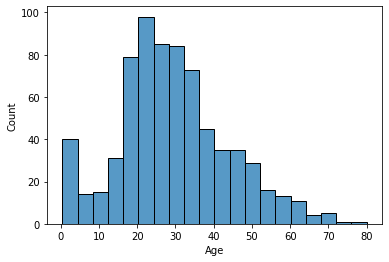

In [540]:
#4th attribute is age
#sns.countplot(x="Survived", hue="Age", data= titanic_data)
#THIS IS REAL BAD WAY !
#HISTOGRAM IS GOOD HERE !
sns.histplot(x= "Age", data = titanic_data)


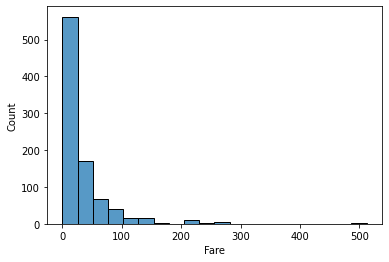

In [541]:
#5th attribute is Fare
sns.histplot(x= "Fare", data= titanic_data, bins=20)

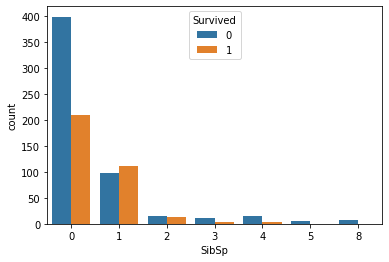

In [542]:
#6th attribute is Sibsp
sns.countplot(x="SibSp", hue = "Survived", data=titanic_data)
#there are mostly with 0 siblings and 0 spouses and they survived more

DATA ANALYSIS IS COMPLETED

LET'S START DATA WRANGLING

In [543]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [544]:
#first check for null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

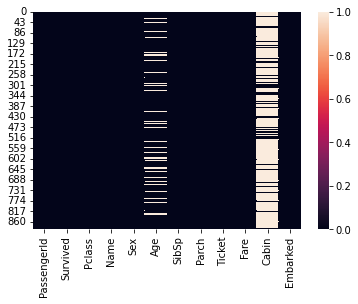

In [545]:
#try to check through heat map
sns.heatmap(titanic_data.isnull())
#most of the cabin data is null drop it, it is useless
#also drop null records  

In [546]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.dropna(inplace= True)

In [547]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [548]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [549]:
#We can't draw insights from Name, Ticket, Passenger Id so drop them 
titanic_data.drop(["Name", "Ticket", "PassengerId"],axis=1, inplace= True)

In [550]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [551]:
#Passenger class, sex, Embarked are categorical data so we need to create dummies
titanic_data= pd.get_dummies(titanic_data, drop_first= True)

#our pandas automatically created dummies for categorical data... 
#but we know passenger class is categorical even it has numerics
#so we need to do manually for P class

In [552]:
Pclss= pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pclss

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [553]:
titanic_data = pd.concat([titanic_data,Pclss], axis=1)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,0,1
886,0,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,0


In [554]:
titanic_data =titanic_data.drop(['Pclass'], axis=1)
#don't forget about axis=1
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


DATA WRANGLING IS DONE

LET'S TRAIN OUR DATA

In [555]:
x=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle=True, random_state=2)

In [558]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(x_train,y_train)
y_predictions = my_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [559]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       130
           1       0.69      0.70      0.70        84

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



In [560]:
print(confusion_matrix(y_test, y_predictions))

[[104  26]
 [ 25  59]]


In [561]:
print(accuracy_score(y_test, y_predictions))

0.7616822429906542


In [562]:
test = pd.read_csv("test[1].csv")

In [563]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [564]:
test.size

4598

In [565]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [566]:
test_data= test.drop(["Cabin", 'Name', 'PassengerId', 'Ticket'], axis=1)

In [567]:
test_data.dropna(inplace=True)

In [568]:
#Passenger class, sex, Embarked are categorical data so we need to create dummies
test_data= pd.get_dummies(test_data, drop_first= True)
Pclss= pd.get_dummies(test_data['Pclass'], drop_first=True)
test_data = pd.concat([test_data,Pclss], axis=1)
test_data.drop(["Pclass"], axis=1, inplace= True)

In [569]:
test_data.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [570]:
my_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [571]:
test_prediction= my_model.predict(test_data)
test_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [588]:
passenger_id = pd.DataFrame({'PassengerId':test['PassengerId']})
Survived = pd.DataFrame({'Survived':test_prediction},dtype='int64')
answer= pd.concat([passenger_id,Survived], axis=1)
answer.dropna(inplace=True)

In [580]:
sample= pd.read_csv("gender_submission[1].csv")

In [583]:
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
